In [1]:
import psaw
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

api = psaw.PushshiftAPI()

In [2]:
sub = "wallstreetbets"

date1 = int(datetime.datetime(2020,1,1).timestamp())
date2 = int(datetime.datetime(2021,1,25).timestamp())

query1 = "GME"
query2 = "Gamestop"

In [3]:
# Create generator object which generates each submission as it goes
gen = api.search_submissions(subreddit=sub,
                            after=date1,
                            before=date2,
                            q='GME|Gamestop')


In [4]:
# Warning, this thing takes time!!
results = list(gen)

/home/dayman/.local/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [37]:
# title, ID, score, creation_date, author, num_comments
columns = ["title", "id", "score", "created_utc", "author", "num_comments"]

# Get the dictionary which holds relevant information for each
# Make it a pandas dataframe
req_submissions = pd.DataFrame([post.d_ for post in results])
data  = np.array(req_submissions[columns])

print(data[data[:,2] > 1])


In [ ]:
# Plotting

def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

from datetime import date, timedelta

start_date = datetime.datetime.utcfromtimestamp(date1)
end_date = datetime.datetime.utcfromtimestamp(date2)

delta = end_date - start_date   # returns timedelta

days = []
for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)
    days.append(day)

print(type(days[0]))    

day_ints = [to_integer(i) for i in days]


[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 8, 1, 0, 1, 0, 0, 1, 0, 1, 9, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 2, 1, 2, 0, 0, 4, 1, 4, 5, 9, 9, 11, 2, 1, 7, 7, 8, 2, 2, 1, 3, 1, 1, 3, 1, 1, 2, 0, 1, 4, 0, 0, 0, 2, 12, 4, 1, 4, 0, 1, 2, 1, 6, 4, 0, 0, 0, 4, 2, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 3, 6, 10, 5, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0, 6, 5, 9, 7, 4, 1, 0, 0, 7, 5, 3, 0, 1, 1, 2, 4, 7, 10, 9, 4, 1, 3, 11, 3, 4, 11, 2, 2, 0, 4, 2, 3, 2, 1, 1, 2, 4, 3, 39, 53, 17, 15, 17, 14, 13, 32, 35, 6, 6, 7, 8, 12, 12, 9, 7, 11, 17, 25, 21, 24, 12, 2, 1, 2, 5, 5, 0, 0, 5, 1, 13, 9, 8, 13, 4, 7, 9, 13, 9, 7, 1

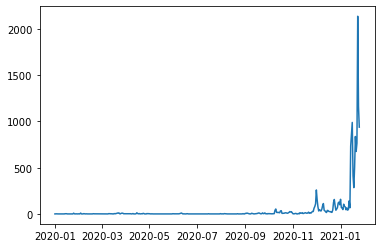

In [100]:
#print(to_integer(datetime.datetime.utcfromtimestamp(data[:,3])))

post_dates = np.array([to_integer(datetime.datetime.utcfromtimestamp(i[3])) for i in data])

num_dates = [len(post_dates[post_dates == i]) for i in day_ints]

print((num_dates))
#print(len(day_ints))

randed = np.random.permutation(days)
plt.plot(days, num_dates)
plt.show()


#day_ints_posts = [data[i,3] for  i in data]
#day_ints_posts = [to_integer(datetime.datetime.utcfromtimestamp(data[i,3])) for i in data]


In [109]:
gen = api.search_submissions(subreddit=sub,
                            after=date1,
                            before=date2,
                            q='GME|Gamestop')
results=list(gen)
len(results)

C:\Users\karlm\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


14715

In [123]:
comments = api.search_comments(subreddit=sub, after=date1,before=date2,q="GME|Gamestop")

generator

In [ ]:
keys_comments = ['id', 'link_id', 'score', 'created_utc', 'author', 'parent_id']

df_comments = pd.DataFrame(columns=keys_comments)
df_comments.to_csv('data_comments.csv', index=False)


for link_id in tqdm(df_subs['id']):
    comments = api.search_comments(subreddit='wallstreetbets',
                                    link_id=link_id)

    df_comments = pd.DataFrame([ {key: obj.d_[key] for key in keys_comments} for obj in comments])
    
    #print(df_comments)
    
    df_comments.to_csv('data_comments.csv', mode='a', index=False, header=False)
